# Bayesian statistics problem set 1 (2025)

Florent Leclercq,<br/>
Institut d'Astrophysique de Paris,<br/>
florent.leclercq@iap.fr

See <a href="https://cloud.aquila-consortium.org/s/2025_ProblemSet1">this document</a> for the exercise statement and <a href="https://cloud.aquila-consortium.org/s/2025_ProblemSet1Solution">this document</a> for a solution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({'lines.linewidth': 2})
plt.rcParams.update({'text.usetex': True})
plt.rcParams.update({'text.latex.preamble': r"\usepackage{amsmath}\usepackage{upgreek}"})
plt.rcParams.update({'font.family': 'serif'})
plt.rcParams.update({'font.size': 15})

## The dominance of the likelihood in Bayesian inference

In [3]:
from scipy.stats import beta

# --- Simulation Setup ---
np.random.seed(42)  # For reproducibility

theta_true = 0.7  # True probability of heads
n = 10          # Number of coin tosses

# Simulate coin tosses: 1 indicates heads, 0 indicates tails.
data = np.random.binomial(1, theta_true, size=n)
k = np.sum(data)
print(f"Small Sample: {k} heads out of {n} tosses")

# Define the priors as (a, b) tuples
priors = {
    'Beta(2,2)': (2, 2),
    'Beta(5,5)': (5, 5),
    'Beta(20,20)': (20, 20)
}

# Define a grid of theta values for plotting
theta_vals = np.linspace(0, 1, 1000)

Small Sample: 6 heads out of 10 tosses


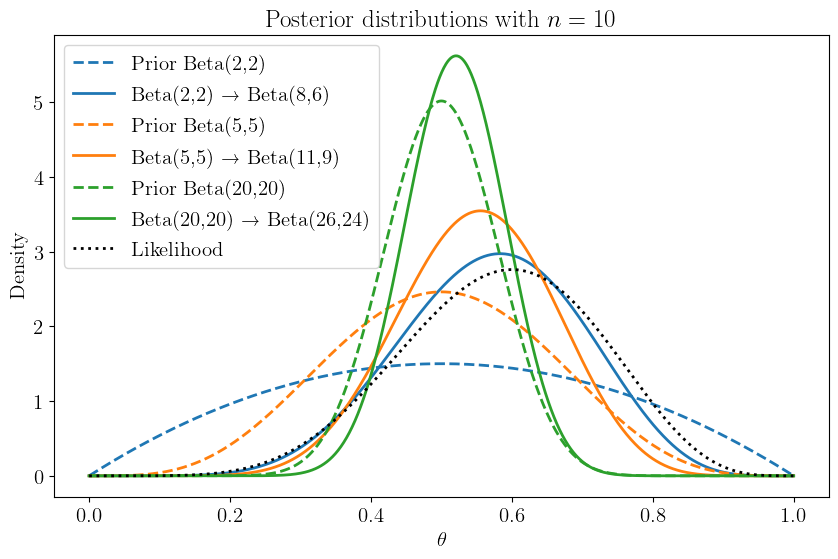

In [4]:
# --- Plotting the Posterior Distributions ---
plt.figure(figsize=(10, 6))

for index, (label, (a, b)) in enumerate(priors.items()):
    # Posterior parameters: a_post = a + k, b_post = b + n - k
    a_post = a + k
    b_post = b + n - k
    prior_pdf = beta.pdf(theta_vals, a, b)
    posterior_pdf = beta.pdf(theta_vals, a_post, b_post)
    plt.plot(theta_vals, prior_pdf, ls="--", label=f"Prior {label}", color=f"C{index}")
    plt.plot(theta_vals, posterior_pdf, label=f"{label} → Beta({a_post},{b_post})", color=f"C{index}")

likelihood_pdf = theta_vals**k * (1 - theta_vals)**(n - k)
likelihood_pdf /= np.trapz(likelihood_pdf, theta_vals)
plt.plot(theta_vals, likelihood_pdf, ls=":", label="Likelihood", color="black")

plt.title("Posterior distributions with $n = 10$")
plt.xlabel(r"$\theta$")
plt.ylabel("Density")
plt.legend()
plt.show()

In [5]:
# --- Large Sample Simulation ---
n_large = 1000  # Large number of tosses
data_large = np.random.binomial(1, theta_true, size=n_large)
k_large = np.sum(data_large)
print(f"Large Sample: {k_large} heads out of {n_large} tosses")

Large Sample: 712 heads out of 1000 tosses


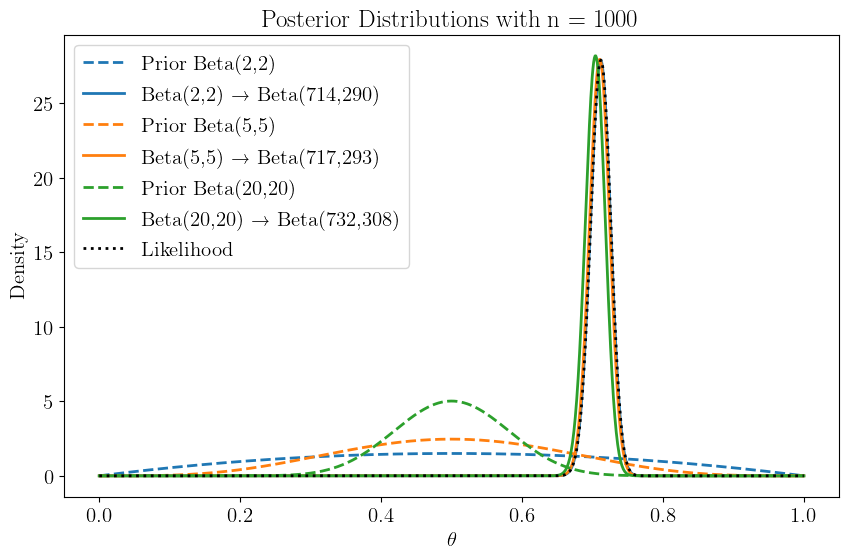

In [6]:
# --- Plotting the Posterior Distributions ---
plt.figure(figsize=(10, 6))

for index, (label, (a, b)) in enumerate(priors.items()):
    # Posterior parameters: a_post = a + k, b_post = b + n - k
    a_post = a + k_large
    b_post = b + n_large - k_large
    prior_pdf = beta.pdf(theta_vals, a, b)
    posterior_pdf = beta.pdf(theta_vals, a_post, b_post)
    plt.plot(theta_vals, prior_pdf, ls="--", label=f"Prior {label}", color=f"C{index}")
    plt.plot(theta_vals, posterior_pdf, label=f"{label} → Beta({a_post},{b_post})", color=f"C{index}")

likelihood_pdf = theta_vals**k_large * (1 - theta_vals)**(n_large - k_large)
likelihood_pdf /= np.trapz(likelihood_pdf, theta_vals)
plt.plot(theta_vals, likelihood_pdf, ls=":", label="Likelihood", color="black")

plt.title("Posterior Distributions with n = 1000")
plt.xlabel(r"$\theta$")
plt.ylabel("Density")
plt.legend()
plt.show()

## Ignorance priors for an urn problem

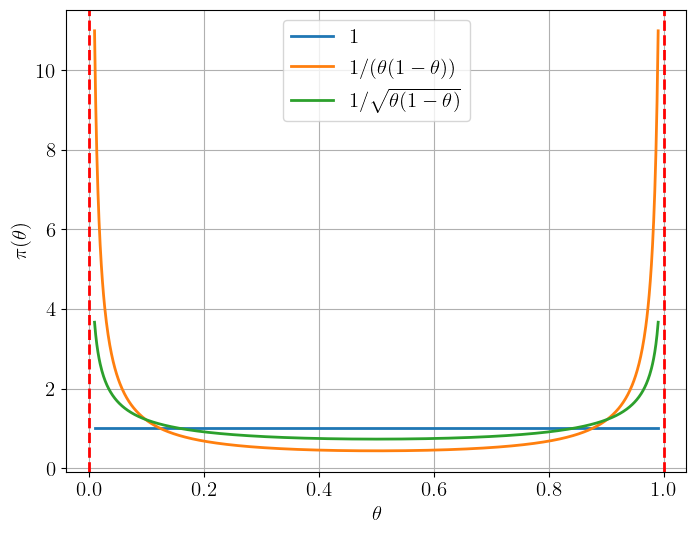

In [ ]:
# Generate x values in the interval (0, 1), avoiding 0 and 1
theta_values = np.linspace(0.01, 0.99, 1000)
odds_prior_pdf = 1 / (theta_values * (1-theta_values))
odds_prior_pdf /= np.trapz(odds_prior_pdf, theta_values)
jeffreys_prior_pdf = 1 / np.sqrt(theta_values * (1-theta_values))
jeffreys_prior_pdf /= np.trapz(jeffreys_prior_pdf, theta_values)

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(theta_values, np.ones_like(theta_values), label='$1$')
plt.plot(theta_values, odds_prior_pdf, label='$1/(\\theta(1-\\theta))$')
plt.plot(theta_values, jeffreys_prior_pdf, label='$1/\sqrt{\\theta(1-\\theta)}$')
plt.xlabel('$\\theta$')
plt.ylabel('$\pi(\\theta)$')
plt.axvline(x=0, color='r', linestyle='--')
plt.axvline(x=1, color='r', linestyle='--')
plt.legend()
plt.grid(True)
plt.savefig('priors_urn_problem.pdf',dpi=300,bbox_inches="tight",transparent=True)